In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Lambda, Dense, Flatten, Dropout
from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
batch_size = 64
img_height = 224
img_width = 224

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Data_Soil/dataset/train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 33111 files belonging to 41 classes.
Using 26489 files for training.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Data_Soil/dataset/test',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8339 files belonging to 41 classes.
Using 1667 files for validation.


In [ ]:
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(img_height,img_width,3))
output = restnet.layers[-1].output
output = keras.layers.Flatten()(output)
restnet = Model(restnet.input, output)
for layer in restnet.layers:
    layer.trainable = False
restnet.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [ ]:
model = keras.Sequential([
      restnet,
      keras.layers.Dense(units = 256, activation = "relu"),
      keras.layers.Dropout(0.3),
      keras.layers.Dense(units = 256, activation = "relu"),    
      keras.layers.Dropout(0.3),
      keras.layers.Dense(units = 41, activation = "softmax"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 100352)            23587712  
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 41)                10537     
                                                                 
Total params: 49,354,409
Trainable params: 25,766,697
No

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=test_ds,
  verbose=1,
  epochs=epochs
)

Epoch 1/50
414/414 [==============================] - 443s 1s/step - loss: 1.9802 - accuracy: 0.4947 - val_loss: 1.3362 - val_accuracy: 0.6533
Epoch 2/50
414/414 [==============================] - 178s 426ms/step - loss: 1.7024 - accuracy: 0.5538 - val_loss: 1.1007 - val_accuracy: 0.7073
Epoch 3/50
414/414 [==============================] - 178s 426ms/step - loss: 1.5464 - accuracy: 0.5831 - val_loss: 0.9797 - val_accuracy: 0.7439
Epoch 4/50
414/414 [==============================] - 178s 426ms/step - loss: 1.3846 - accuracy: 0.6150 - val_loss: 0.9780 - val_accuracy: 0.7630
Epoch 5/50
414/414 [==============================] - 178s 425ms/step - loss: 1.3093 - accuracy: 0.6291 - val_loss: 0.8660 - val_accuracy: 0.7552
Epoch 6/50
414/414 [==============================] - 178s 425ms/step - loss: 1.2310 - accuracy: 0.6442 - val_loss: 0.8195 - val_accuracy: 0.7708
Epoch 7/50
414/414 [==============================] - 177s 424ms/step - loss: 1.1886 - accuracy: 0.6541 - val_loss: 0.8124 - va

Text(0.5, 1.0, 'Training and Validation Accuracy')

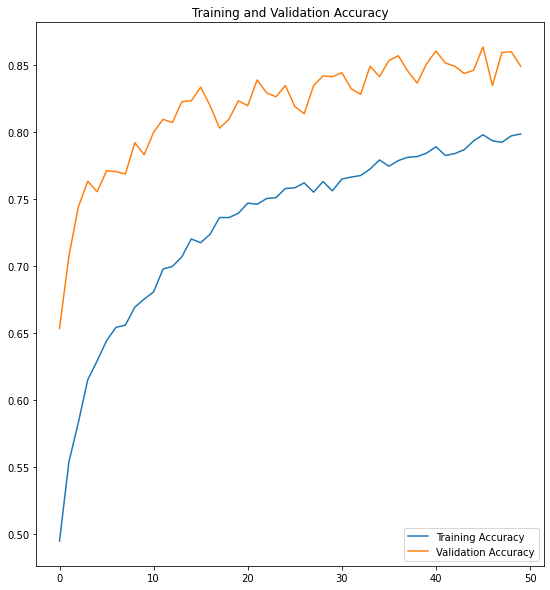

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

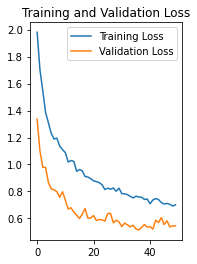

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
tf.keras.models.save_model(model,'/content/drive/MyDrive/ResNet50_Plant_Model.hdf5')